In [1]:
import sys
sys.path.insert(1, "../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xarray as xr

import advtraj.utils.grid_mapping as advtraj_gm
import advtraj.cli.uclales as uclales_cli

%matplotlib widget

In [3]:
#ds = uclales_cli.load_data("/home/earlcd/Desktop/tmp/rico.????????.nc")
ds = uclales_cli.load_data("/home/earlcd/git-repos/uclales/rico.????????.nc")
#ds = uclales_cli.load_data("/home/earlcd/git-repos/uclales/rico.nc")

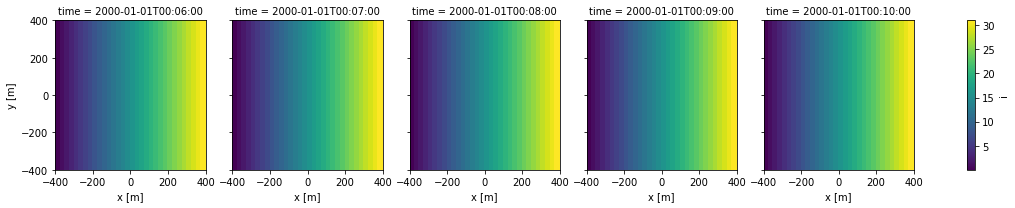

In [4]:
# plot x grid-indecies
ds_position_scalars = ds.sel(z=700, method="nearest").isel(time=slice(-5, None))

N_grid = dict(x=int(ds.x.count()), y=int(ds.y.count()))
ds_grid_idxs = advtraj_gm.estimate_initial_grid_indecies(
    ds_position_scalars=ds_position_scalars,
    N_grid=N_grid
)

ds_grid_idxs.i.plot(col="time", col_wrap=5)

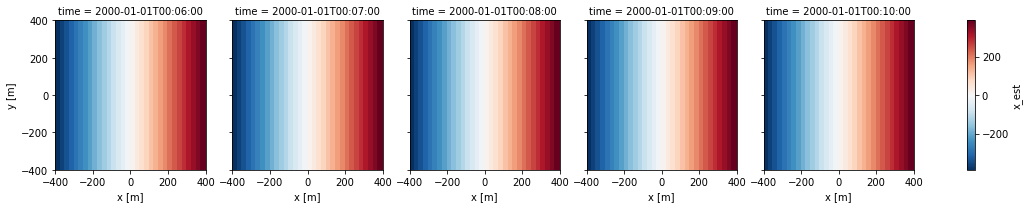

In [5]:
ds_position_scalars = ds.sel(z=700, method="nearest").isel(time=slice(-5, None))

N_grid = dict(x=int(ds.x.count()), y=int(ds.y.count()))
ds_grid_idxs = advtraj_gm.estimate_initial_grid_indecies(
    ds_position_scalars=ds_position_scalars,
    N_grid=N_grid
)

ds_pos = advtraj_gm.estimate_3d_position_from_grid_indecies(
    ds_grid=ds, i=ds_grid_idxs.i, j=ds_grid_idxs.j,
    k=ds_grid_idxs.k,
)

ds_pos.x_est.plot(col="time", col_wrap=5)

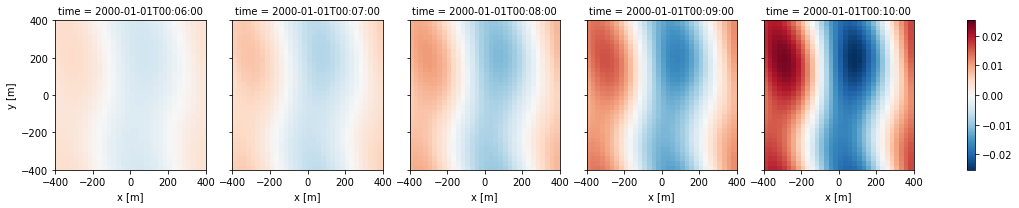

In [6]:
# plot displacement in x-direction
(ds_pos.x_est - ds_pos.x).plot(col="time", col_wrap=5)